In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [7]:
data= pd.read_csv('train.csv')
print(data.shape)
print(data.info())
print(data.describe())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [8]:
missing= data.isnull().sum()
missing= missing[missing>0]
data= data.drop(columns= missing.index)

In [9]:
features= ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
target='SalePrice'
X= data[features]
y= data[target]

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X ,y, test_size=0.2, random_state= 42)

In [11]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha = 1.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [16]:
def evaluate_model(name, y_true, y_pred):
    rmse= np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Model")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}\n")

In [21]:
evaluate_model("Linear Regression: ", y_test, y_pred_lr)
evaluate_model("Ridge Regression: ", y_test, y_pred_ridge)
evaluate_model("Lasso Regression: ", y_test, y_pred_lasso)

Linear Regression:  Model
RMSE: 39710.99
R^2 Score: 0.79

Ridge Regression:  Model
RMSE: 39715.48
R^2 Score: 0.79

Lasso Regression:  Model
RMSE: 39711.16
R^2 Score: 0.79



<function matplotlib.pyplot.show(close=None, block=None)>

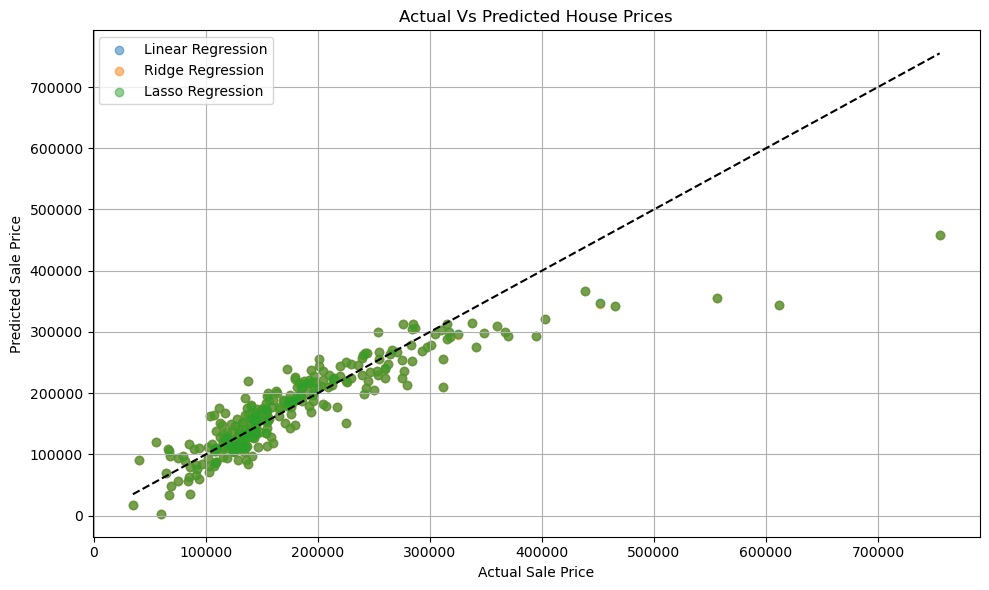

In [22]:
plt.figure(figsize= (10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label= 'Linear Regression')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label = 'Ridge Regression')
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label = 'Lasso Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.title('Actual Vs Predicted House Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show